#  Versuchdaten, Datenframe erstellen und anschauen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline
  
df = pd.read_csv("data2.csv")

### Datenframe anschauen

In [2]:
df

,b,g,y
0,0.1,10.0,0.90
1,0.1,18.0,0.30
2,0.3,10.0,0.90
3,0.3,18.0,0.50
4,0.2,14.0,2.80
5,0.1,17.5,0.40
6,0.3,17.5,0.45
7,0.2,13.2,18.40
8,0.1,13.2,20.00


In [3]:
df.describe()

,b,g,y
count,9.000000,9.000000,9.000000
mean,0.188889,14.600000,4.961111
std,0.092796,3.288997,8.117950
min,0.100000,10.000000,0.300000
25%,0.100000,13.200000,0.450000
50%,0.200000,14.000000,0.900000
75%,0.300000,17.500000,2.800000
max,0.300000,18.000000,20.000000


## Plotten
### Data Plot

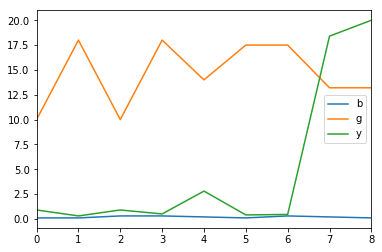

In [4]:
df.plot()

###  Boxplot

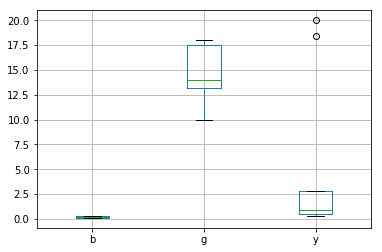

In [5]:
df.boxplot()


### 3D Scatter Plot

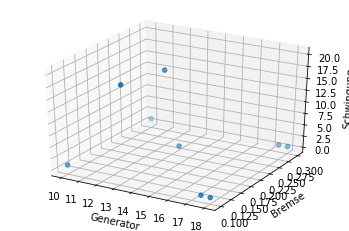

In [6]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.g, df.b, df.y)
threedee.set_xlabel('Generator')
threedee.set_ylabel('Bremse')
threedee.set_zlabel('Schwingung')
plt.show()

# Ein einfaches Lineares Regressions Model

In [7]:
# Create linear regression object 
regr = linear_model.LinearRegression() 

x= df.iloc[:,0:1]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 

print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)

Koeffizienten: 
 [-21.46774194]

Intercept: 9.016129032258066


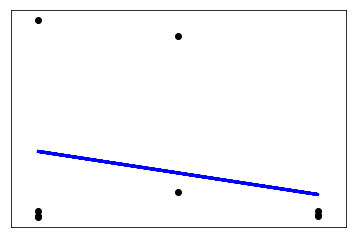

In [8]:
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [9]:
x= df.iloc[:,0:2]
y= df.iloc[:,2]

x= x.values
y=y.values

### Das linear model benötigt numPy arrays, daher formen wir unsere Daten um, X zu einem 2-dimensionalen 25x2, bzw. Y zu 25, eindimensional

In [10]:
x.shape

(9, 2)

In [11]:
y.shape

(9,)

### Model Fitten

In [12]:
model = LinearRegression().fit(x, y)

### Model Parameter und Anpassungsgüte betrachten

In [13]:
print('intercept:', model.intercept_)


intercept: 18.168182107168505


In [14]:
print('slope:', model.coef_)

slope: [-20.15941576  -0.64377954]


In [15]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.12802737785344065


### Model nutzen um Werte vorherzusagen

In [16]:
yPred= model.predict(x)

# Fortgeschritten: Statsmodel package, zahlreiche Statistiken

In [17]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                    0.4405
Date:                Sun, 12 Jan 2020   Prob (F-statistic):              0.663
Time:                        17:29:21   Log-Likelihood:                -30.471
No. Observations:                   9   AIC:                             66.94
Df Residuals:                       6   BIC:                             67.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1682     15.090      1.204      0.2

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


# Pfad des steilsten Anstiegs

In [18]:
## Daten einlesen
df = pd.read_csv("data2.csv")

## Modell-X sind Generator und Bremse in den Daten
X = np.c_[df.g, df.b]
## Modell-Y ist die Schwingung
y = df.y

## Modell Bauen und Ausgeben
res = smf.ols('y ~ g+b ', data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                    0.4405
Date:                Sun, 12 Jan 2020   Prob (F-statistic):              0.663
Time:                        17:29:21   Log-Likelihood:                -30.471
No. Observations:                   9   AIC:                             66.94
Df Residuals:                       6   BIC:                             67.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1682     15.090      1.204      0.2

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


## Modell Koeffizienten
Die Koeffizienten des Regressionsmodells zeigen die Richtung des steilsten Anstiegs im Modell.

In [19]:
## Die Koeffizienten sind in .params gespeichert
print(res.params)

Intercept    18.168182
g            -0.643780
b           -20.159416
dtype: float64


In [20]:
## Koeffizienten extrahieren
beta = np.c_[res.params.g, res.params.b]

## Mittelpunkt der Generator / Bremse -- ACHTUNG -- nicht der Mittelwert / Mean!
cb = np.min(df.b) + (np.max(df.b) - np.min(df.b))/2.0
cg = np.min(df.g) + (np.max(df.g) - np.min(df.g))/2.0
center = np.c_[cg, cb]

## Ausgehend vom berechneten Mittelpunkt mit vorgegebener Schrittweite gehen.
stepwidth = 0.5
for i in range(10):
    xnew = center + i * stepwidth * beta
    print(xnew)

[[14.   0.2]]
[[13.67811023 -9.87970788]]
[[ 13.35622046 -19.95941576]]
[[ 13.03433068 -30.03912365]]
[[ 12.71244091 -40.11883153]]
[[ 12.39055114 -50.19853941]]
[[ 12.06866137 -60.27824729]]
[[ 11.74677159 -70.35795517]]
[[ 11.42488182 -80.43766306]]
[[ 11.10299205 -90.51737094]]


# Modell 2. Ordnung

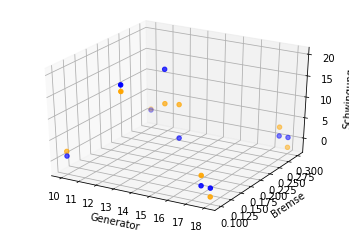

In [21]:
from sklearn.preprocessing import PolynomialFeatures

## Daten einlesen
df = pd.read_csv("data2.csv")

## Modell-X sind Generator und Bremse in den Daten
X = np.c_[df.g, df.b]
## Modell-Y ist die Schwingung
y = df.y

## 2. Grades
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
xp = poly.fit_transform(X)

## Modell fitten
model = sm.OLS(y, xp).fit()

## Punkte für Plot vorhersagen
y_pred = model.predict(xp)

## Plotten
p = plt.figure().gca(projection='3d')
p.scatter(X[:,0], X[:,1], y, color='blue')
p.set_xlabel('Generator')
p.set_ylabel('Bremse')
p.set_zlabel('Schwingung')
p.scatter(X[:,0], X[:,1], y_pred, color='orange')
plt.show()

## Predict New Data

In [23]:
xnew = np.c_[13.4,0.2]
xnew_p = poly.fit_transform(xnew)
ynew = model.predict(xnew_p)
ynew

array([10.63987379])